<a href="https://colab.research.google.com/github/divya374r1/Neural-Network-and-Deep-Learning/blob/main/Handwritten_digit_recognition_program_using_a_fully_connected_neural_network_(Dense_layers)_on_the_MNIST_dataset_(Image%2CTWO_Digit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8765 - loss: 0.4301
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9649 - loss: 0.1234
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9771 - loss: 0.0784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9829 - loss: 0.0558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9879 - loss: 0.0416
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0869
Test Accuracy: 0.9786999821662903
Enter the TWO-digit image path (example: two_digits.png): /content/two digit.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Left Digit  = 2
Predicted Right Digit = 7


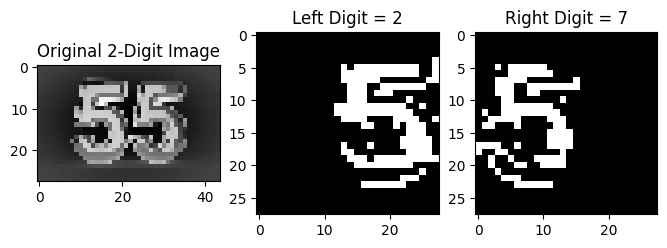

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings

# Suppress specific Keras UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.layers.reshaping.flatten')

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build the model
model = models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
model.fit(x_train, y_train, epochs=5)
# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# ---------- USER INPUT PART ----------
img_path = input("Enter the TWO-digit image path (example: two_digits.png): ")

# Load the image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to maintain aspect ratio and fit two digits side by side
height, width = img.shape

# Resize height to 28 and scale width proportionally
new_width = int(width * (28 / height))
img_resized = cv2.resize(img, (new_width, 28))

# Invert colors if background is white
if np.mean(img_resized) > 127:
    img_resized = 255 - img_resized

# Normalize
img_resized = img_resized / 255.0

# Split the image into two digits
mid = new_width // 2
left_digit = img_resized[:, :mid]
right_digit = img_resized[:, mid:]

# Resize each digit to 28x28 (MNIST standard)
left_digit = cv2.resize(left_digit, (28, 28))
right_digit = cv2.resize(right_digit, (28, 28))

# Threshold for cleaner prediction
_, left_digit = cv2.threshold(left_digit, 0.5, 1.0, cv2.THRESH_BINARY)
_, right_digit = cv2.threshold(right_digit, 0.5, 1.0, cv2.THRESH_BINARY)# Prepare for prediction
left_digit_input = left_digit.reshape(1, 28, 28)
right_digit_input = right_digit.reshape(1, 28, 28)

# Predict
pred_left = model.predict(left_digit_input)
pred_right = model.predict(right_digit_input)

digit_left = pred_left.argmax()
digit_right = pred_right.argmax()

print("Predicted Left Digit  =", digit_left)
print("Predicted Right Digit =", digit_right)

# ---------- DISPLAY ----------
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_resized, cmap='gray')
plt.title("Original 2-Digit Image")

plt.subplot(1, 3, 2)
plt.imshow(left_digit, cmap='gray')
plt.title("Left Digit = " + str(digit_left))

plt.subplot(1, 3, 3)
plt.imshow(right_digit, cmap='gray')
plt.title("Right Digit = " + str(digit_right))

plt.show()
